In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [3]:
file_path = Path("..", "data", "alzheimers_disease_data.csv")

data = pd.read_csv(file_path)
data_Diagnosed_Before = data[data['Diagnosis'] == 1] 

data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
# Drop the Doctor in Charge, As it is confiential data only 'XXXX' is a value
data.drop(['DoctorInCharge'],axis=1, inplace=True)

In [5]:
# Dictonaries of replacement data for Medical History
Gender_Dict = {0:'Male',1:'Female'}
Ethnicity_Dict = {0:'Caucasian', 1:'African American', 2:'Asian', 3:'Other'}
Education_Dict = {0:"None", 1:"High School", 2:"Bachelor's", 3: "Higher"}
Smoking_Dict = {0:'No', 1:'Yes'}
FamilyHistoryAlzheimers_Dict = {0:'No',1:'Yes'}
CardiovascularDisease_Dict = {0:'No', 1:'Yes'}
Diabetes_Dict = {0:'No', 1:'Yes'}
Depression_Dict = {0:'No', 1:'Yes'}
HeadInjury_Dict = {0:'No', 1: 'Yes'} 
Hypertension_Dict = {0:'No', 1: 'Yes'} 

In [6]:
# Replaceing of Data for Medical History
data['Gender'].replace(to_replace=Gender_Dict,inplace=True)
data['Ethnicity'].replace(to_replace=Ethnicity_Dict,inplace=True)
data['EducationLevel'].replace(to_replace=Education_Dict,inplace=True)
data['Smoking'].replace(to_replace=Smoking_Dict,inplace=True)
data['FamilyHistoryAlzheimers'].replace(to_replace=FamilyHistoryAlzheimers_Dict,inplace=True)
data['CardiovascularDisease'].replace(to_replace=CardiovascularDisease_Dict,inplace=True)
data['Diabetes'].replace(to_replace=Diabetes_Dict,inplace=True)
data['Depression'].replace(to_replace=Depression_Dict,inplace=True)
data['HeadInjury'].replace(to_replace=HeadInjury_Dict,inplace=True)
data['Hypertension'].replace(to_replace=Hypertension_Dict,inplace=True)

data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,Male,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,Yes,No,No,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,Male,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,No,No,No,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,Male,Other,High School,17.795882,No,19.555085,7.844988,1.826335,9.673574,Yes,No,No,No,No,No,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,Female,Caucasian,High School,33.800817,Yes,12.209266,8.428001,7.435604,8.392554,No,No,No,No,No,No,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,Male,Caucasian,None,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


In [7]:
# Dictonaries of replacement data for Cognitive and Functional Assessments

MemoryComplaints_Dict = {0:'No', 1:'Yes'}
BehavioralProblems_Dict = {0:'No', 1:'Yes'}

In [8]:
# Replaceing of Data for Cognitive and Functional Assessments
data['MemoryComplaints'].replace(to_replace=MemoryComplaints_Dict, inplace=True)
data['BehavioralProblems'].replace(to_replace=BehavioralProblems_Dict, inplace=True)

data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,Male,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,Yes,No,No,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,0,0,0,1,0,0
1,4752,89,Male,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,No,No,No,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,0,0,0,0,1,0
2,4753,73,Male,Other,High School,17.795882,No,19.555085,7.844988,1.826335,9.673574,Yes,No,No,No,No,No,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,0,1,0,1,0,0
3,4754,74,Female,Caucasian,High School,33.800817,Yes,12.209266,8.428001,7.435604,8.392554,No,No,No,No,No,No,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,0,0,0,0,0,0
4,4755,89,Male,Caucasian,None,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,0,0,1,1,0,0


In [9]:
# Dictonaries of replacement data for Symptoms

Confusion_Dict = {0: 'No', 1: 'Yes'}
Disorientation_Dict = {0: 'No', 1: 'Yes'}
PersonalityChanges_Dict = {0: 'No', 1: 'Yes'}
DifficultyCompletingTasks_Dict = {0: 'No', 1: 'Yes'}
Forgetfulness_Dict = {0: 'No', 1: 'Yes'}

In [10]:
# Replaceing of Data for Symptoms
data['Confusion'].replace(to_replace=Confusion_Dict, inplace=True)
data['Disorientation'].replace(to_replace=Disorientation_Dict, inplace=True)
data['PersonalityChanges'].replace(to_replace=PersonalityChanges_Dict, inplace=True)
data['DifficultyCompletingTasks'].replace(to_replace=DifficultyCompletingTasks_Dict, inplace=True)
data['Forgetfulness'].replace(to_replace=Forgetfulness_Dict, inplace=True)

data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,Male,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,Yes,No,No,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,No,No,Yes,No,0
1,4752,89,Male,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,No,No,No,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,No,Yes,0
2,4753,73,Male,Other,High School,17.795882,No,19.555085,7.844988,1.826335,9.673574,Yes,No,No,No,No,No,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,Yes,No,0
3,4754,74,Female,Caucasian,High School,33.800817,Yes,12.209266,8.428001,7.435604,8.392554,No,No,No,No,No,No,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,No,No,No,No,No,0
4,4755,89,Male,Caucasian,None,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,No,No,Yes,Yes,No,0


In [11]:
Diagnosis_Dict = {0: "No", 1: "Yes"}

data['Diagnosis'].replace(to_replace=Diagnosis_Dict, inplace=True)

data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,Male,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,Yes,No,No,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,No,No,Yes,No,No
1,4752,89,Male,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,No,No,No,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,No,Yes,No
2,4753,73,Male,Other,High School,17.795882,No,19.555085,7.844988,1.826335,9.673574,Yes,No,No,No,No,No,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,Yes,No,No
3,4754,74,Female,Caucasian,High School,33.800817,Yes,12.209266,8.428001,7.435604,8.392554,No,No,No,No,No,No,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,No,No,No,No,No,No
4,4755,89,Male,Caucasian,None,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,Male,Caucasian,High School,39.121757,No,1.561126,4.049964,6.555306,7.535540,No,No,No,No,No,No,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,No,No,4.492838,Yes,No,No,No,No,Yes
2145,6896,75,Male,Caucasian,Bachelor's,17.857903,No,18.767261,1.360667,2.904662,8.555256,No,No,No,No,No,No,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,No,Yes,9.204952,No,No,No,No,No,Yes
2146,6897,77,Male,Caucasian,High School,15.476479,No,4.594670,9.886002,8.120025,5.769464,No,No,No,No,No,No,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,No,No,5.036334,No,No,No,No,No,Yes
2147,6898,78,Female,Other,High School,15.299911,No,8.674505,6.354282,1.263427,8.322874,No,Yes,No,No,No,No,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,No,No,3.785399,No,No,No,No,Yes,Yes


In [12]:
#data.rename(columns=str.upper).head()

In [13]:
# Get all Column Header Labels as List
for column_headers in data.columns: 
    print(column_headers)

PatientID
Age
Gender
Ethnicity
EducationLevel
BMI
Smoking
AlcoholConsumption
PhysicalActivity
DietQuality
SleepQuality
FamilyHistoryAlzheimers
CardiovascularDisease
Diabetes
Depression
HeadInjury
Hypertension
SystolicBP
DiastolicBP
CholesterolTotal
CholesterolLDL
CholesterolHDL
CholesterolTriglycerides
MMSE
FunctionalAssessment
MemoryComplaints
BehavioralProblems
ADL
Confusion
Disorientation
PersonalityChanges
DifficultyCompletingTasks
Forgetfulness
Diagnosis


In [14]:
data_new = data.rename(columns={'AlcoholConsumption': 'AlcoholConsumption (Units per Week)',
                                "PhysicalActivity" : "PhysicalActivity (Hours per Week )",
                                "BMI" : "BMI (Ranging from 15 to 40)",
                                "DietQuality" : "DietQuality (Ranging from 0 to 10)",
                                "SystolicBP" : "SystolicBP (Ranging from 90 to 180 mmHg)",

                                "DiastolicBP" : "DiastolicBP (Ranging from 60 to 120 mmHg)",
                                "CholesterolTotal" : "CholesterolTotal (Ranging from 150 to 300 mg/dL)",
                                "CholesterolLDL" : "CholesterolLDL (Ranging from 50 to 200 mg/dL)",
                                "CholesterolHDL" : "CholesterolHDL (Ranging from 20 to 100 mg/dL)",
                                "CholesterolTriglycerides" : "CholesterolTriglycerides (50 to 400 mg/dL)",

                                "MMSE" : "MMSE (Ranging from 0 to 30)",
                                "FunctionalAssessment" : "FunctionalAssessment (Ranging from 0 to 10)",
                                "ADL" : "ADL (Ranging from 0 to 10)",


                                "SleepQuality" : "SleepQuality (Ranging from 4 to 10)"})
data_new

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI (Ranging from 15 to 40),Smoking,AlcoholConsumption (Units per Week),PhysicalActivity (Hours per Week ),DietQuality (Ranging from 0 to 10),SleepQuality (Ranging from 4 to 10),FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP (Ranging from 90 to 180 mmHg),DiastolicBP (Ranging from 60 to 120 mmHg),CholesterolTotal (Ranging from 150 to 300 mg/dL),CholesterolLDL (Ranging from 50 to 200 mg/dL),CholesterolHDL (Ranging from 20 to 100 mg/dL),CholesterolTriglycerides (50 to 400 mg/dL),MMSE (Ranging from 0 to 30),FunctionalAssessment (Ranging from 0 to 10),MemoryComplaints,BehavioralProblems,ADL (Ranging from 0 to 10),Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,Male,Caucasian,Bachelor's,22.927749,No,13.297218,6.327112,1.347214,9.025679,No,No,Yes,Yes,No,No,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,No,No,1.725883,No,No,No,Yes,No,No
1,4752,89,Male,Caucasian,None,26.827681,No,4.542524,7.619885,0.518767,7.151293,No,No,No,No,No,No,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,No,No,2.592424,No,No,No,No,Yes,No
2,4753,73,Male,Other,High School,17.795882,No,19.555085,7.844988,1.826335,9.673574,Yes,No,No,No,No,No,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,No,No,7.119548,No,Yes,No,Yes,No,No
3,4754,74,Female,Caucasian,High School,33.800817,Yes,12.209266,8.428001,7.435604,8.392554,No,No,No,No,No,No,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,No,Yes,6.481226,No,No,No,No,No,No
4,4755,89,Male,Caucasian,None,20.716974,No,18.454356,6.310461,0.795498,5.597238,No,No,No,No,No,No,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,Male,Caucasian,High School,39.121757,No,1.561126,4.049964,6.555306,7.535540,No,No,No,No,No,No,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,No,No,4.492838,Yes,No,No,No,No,Yes
2145,6896,75,Male,Caucasian,Bachelor's,17.857903,No,18.767261,1.360667,2.904662,8.555256,No,No,No,No,No,No,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,No,Yes,9.204952,No,No,No,No,No,Yes
2146,6897,77,Male,Caucasian,High School,15.476479,No,4.594670,9.886002,8.120025,5.769464,No,No,No,No,No,No,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,No,No,5.036334,No,No,No,No,No,Yes
2147,6898,78,Female,Other,High School,15.299911,No,8.674505,6.354282,1.263427,8.322874,No,Yes,No,No,No,No,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,No,No,3.785399,No,No,No,No,Yes,Yes


In [15]:
# selecting rows based on condition 'Diagnosis'] == 'Yes'
data_Diagnosed = data_new[data_new['Diagnosis'] == 'Yes'] 
data_Diagnosed_count =  len(data_Diagnosed.index)
print('\n Number of participant : ', len(data_new))
print('\n Number of participant diagnosed with  Alzheimer : ', data_Diagnosed_count)
#data_Diagnosed.head()  



 Number of participant :  2149

 Number of participant diagnosed with  Alzheimer :  760


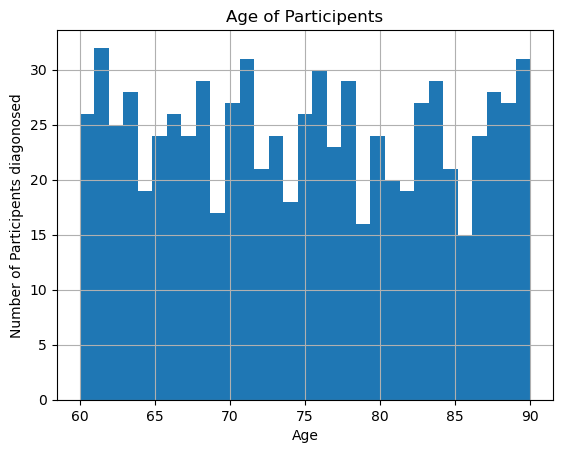

In [16]:
bins_Age = data_Diagnosed['Age'].astype('int').max() - data_Diagnosed['Age'].astype('int').min()+1
data_Diagnosed['Age'].hist(bins=bins_Age)
plt.xlabel('Age')
plt.ylabel('Number of Participents diagonosed')
plt.title('Age of Participents')
plt.show()

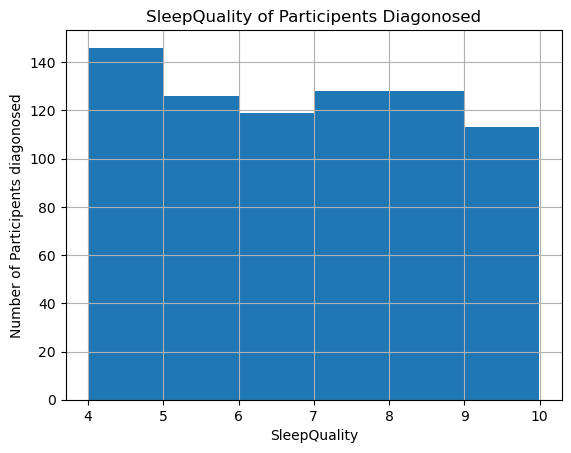

In [17]:
bins_Sleep = data_Diagnosed_Before['SleepQuality'].astype('int').max() - data_Diagnosed_Before['SleepQuality'].astype('int').min()+1
data_Diagnosed_Before['SleepQuality'].hist(bins=bins_Sleep)
plt.xlabel('SleepQuality')
plt.ylabel('Number of Participents diagonosed')
plt.title('SleepQuality of Participents Diagonosed')
plt.show()

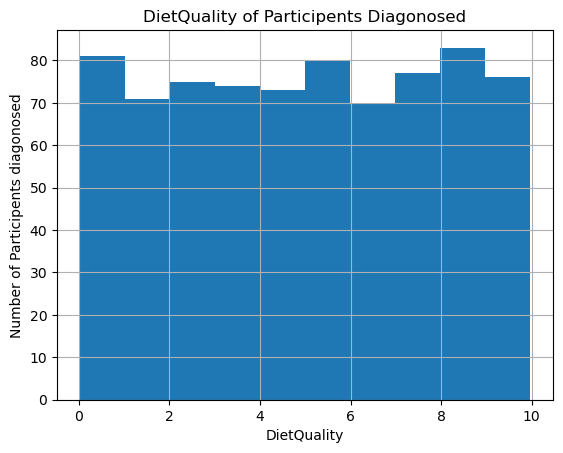

In [18]:
bins_Diat = data_Diagnosed_Before['DietQuality'].astype('int').max() - data_Diagnosed_Before['DietQuality'].astype('int').min()+1
data_Diagnosed_Before['DietQuality'].hist(bins=bins_Diat)
plt.xlabel('DietQuality')
plt.ylabel('Number of Participents diagonosed')
plt.title('DietQuality of Participents Diagonosed')
plt.show()

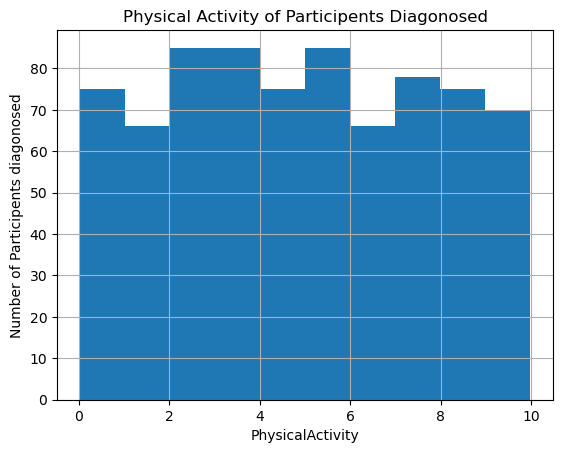

In [19]:
bins_Diat = data_Diagnosed_Before['PhysicalActivity'].astype('int').max() - data_Diagnosed_Before['PhysicalActivity'].astype('int').min()+1
data_Diagnosed_Before['PhysicalActivity'].hist(bins=bins_Diat)
plt.xlabel('PhysicalActivity')
plt.ylabel('Number of Participents diagonosed')
plt.title('Physical Activity of Participents Diagonosed')
plt.show()

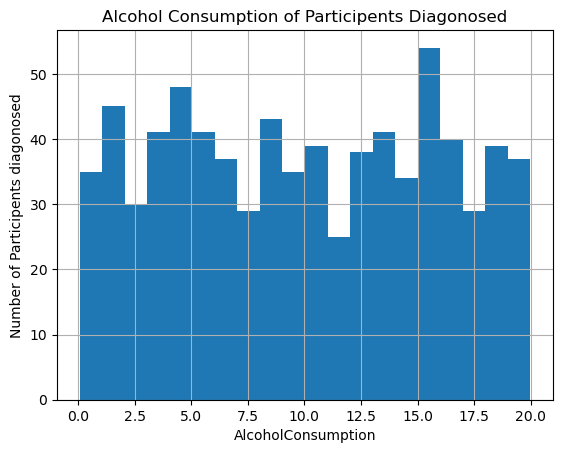

In [20]:
bins_Diat = data_Diagnosed_Before['AlcoholConsumption'].astype('int').max() - data_Diagnosed_Before['AlcoholConsumption'].astype('int').min()+1
data_Diagnosed_Before['AlcoholConsumption'].hist(bins=bins_Diat)
plt.xlabel('AlcoholConsumption')
plt.ylabel('Number of Participents diagonosed')
plt.title('Alcohol Consumption of Participents Diagonosed')
plt.show()

<Axes: title={'center': 'Study Paticipents diagnosed with Alzheimer by Behavioral Problems'}>

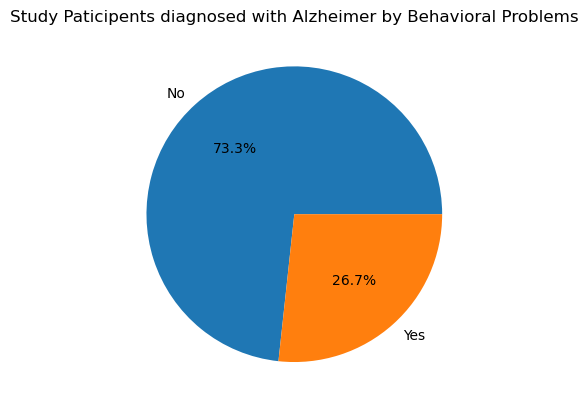

In [21]:
data_Diagnosed.groupby('BehavioralProblems')['PatientID'].count().plot.pie(autopct='%1.1f%%', title = 'Study Paticipents diagnosed with Alzheimer by Behavioral Problems',ylabel = "")

<Axes: title={'center': 'Study Paticipents diagnosed with Alzheimer by Depression'}>

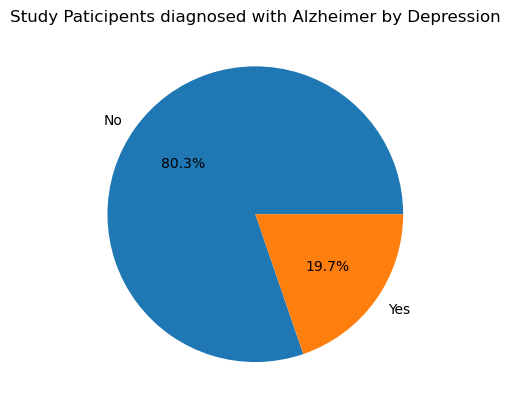

In [22]:
data_Diagnosed.groupby('Depression')['PatientID'].count().plot.pie(autopct='%1.1f%%', title = 'Study Paticipents diagnosed with Alzheimer by Depression',ylabel = "")

<Axes: title={'center': 'Study Paticipents diagnosed with Alzheimer by Ethnicity'}>

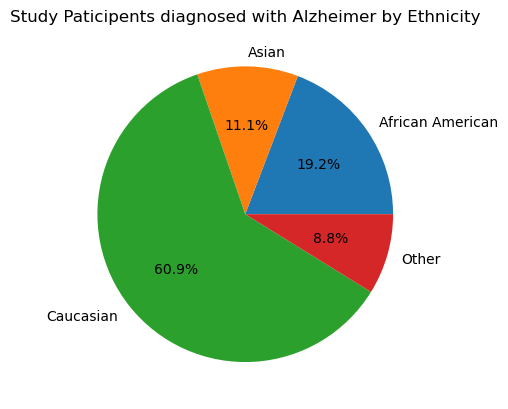

In [23]:
data_Diagnosed.groupby('Ethnicity')['PatientID'].count().plot.pie(autopct='%1.1f%%', title = 'Study Paticipents diagnosed with Alzheimer by Ethnicity',ylabel = "")

<Axes: title={'center': 'Study Paticipents diagnosed with Alzheimer by Family History'}>

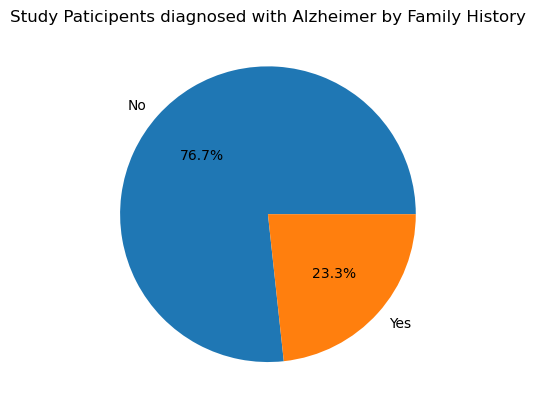

In [24]:
data_Diagnosed.groupby('FamilyHistoryAlzheimers')['PatientID'].count().plot.pie(autopct='%1.1f%%', title = 'Study Paticipents diagnosed with Alzheimer by Family History',ylabel = "")

<Axes: title={'center': 'Study Paticipents diagnosed with Alzheimer by EducationLevel'}>

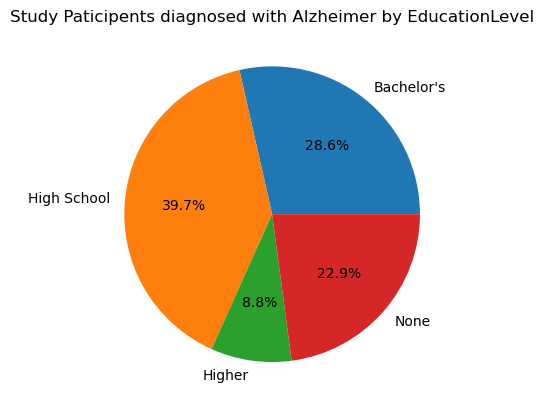

In [25]:
data_Diagnosed.groupby('EducationLevel')['PatientID'].count().plot.pie(autopct='%1.1f%%', title = 'Study Paticipents diagnosed with Alzheimer by EducationLevel',ylabel = "")

<Axes: title={'center': 'Study Paticipents diagnosed with Alzheimer by Confusion'}>

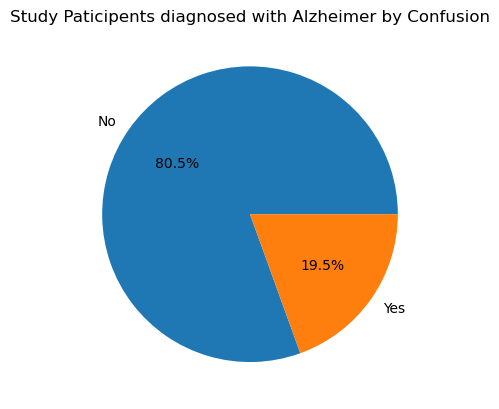

In [26]:
data_Diagnosed.groupby('Confusion')['PatientID'].count().plot.pie(autopct='%1.1f%%', title = 'Study Paticipents diagnosed with Alzheimer by Confusion',ylabel = "")

<Axes: title={'center': 'Study Paticipents diagnosed with Alzheimer by Depression and Head Injury'}>

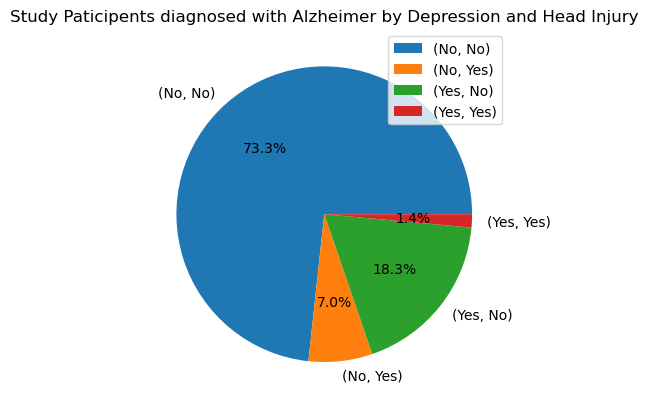

In [27]:
data_Diagnosed.groupby(['Depression','HeadInjury'])['PatientID'].count().plot.pie(autopct='%1.1f%%', title = 'Study Paticipents diagnosed with Alzheimer by Depression and Head Injury',ylabel = "",legend = [""])

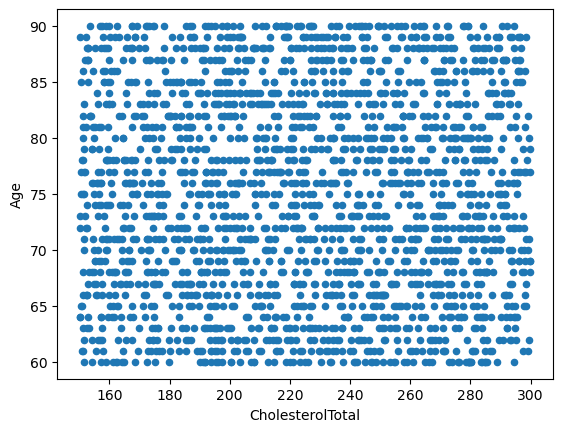

In [28]:
data.plot(kind='scatter', x= 'CholesterolTotal', y='Age')

plt.show()